INTEGRACIÓN NUMÉRICA

In [1]:
#Este ejercicio preparatorio busca que usted implemente correctamente tres métodos de integración numérica. Pruebe distintos valores de h. Si termina el ejercicio antes de que acabe la clase, repita el proceso para el método de Monte Carlo y el método del valor medio.

import numpy as np
import matplotlib.pylab as plt

# Función a integrar
def funcion(x1):
    	return np.cos(x1)


In [2]:
#El intervalo de integración es de 0 a 3pi/2.
#Divida el intervalo de integración en M secciones para calcular sus integrales.
#pruebe distintos valores de M

# paso 1: use linespace (ver documentación: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
# para hacer el arreglo de su intervalo en x
M=9999
a=0
b=3*np.pi/2

#paso 2: genere el arreglo de valores de su función fx:
x = np.linspace(a,b,M)
fx = funcion(x)

integral = -1

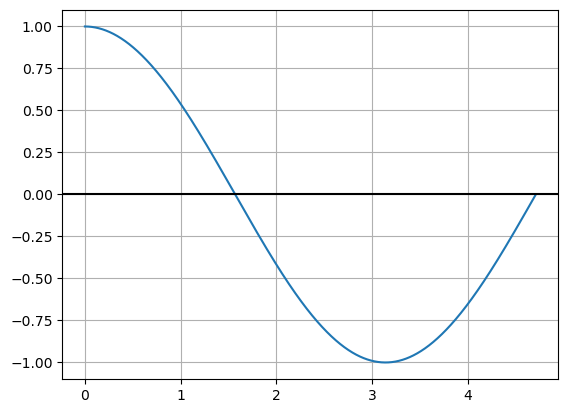

In [3]:
#1) grafique su función para verificar que hizo bien los pasos anteriores


import matplotlib.pyplot as plt

plt.plot(x,fx)
plt.axhline(y=0, xmin=0, xmax=1, color = 'k')
plt.grid()
plt.show()

In [4]:
# 2a). Usando el método de suma de rectángulos, calcule la integral de la función.
#Compare su valor obtenido numéricamente con el valor analitico e imprima ambos valores.

def integral_rect(f,a,b,M):
  h = (b-a)/(M-1)
  return np.sum(fx[1:]*h)

resultado_rect = integral_rect(fx,a,b,M)
error_rect = np.abs(integral-resultado_rect)

print("Rectángulos: ", resultado_rect)
print("Analítico: ", integral)
print("Error: ", error_rect)

Rectángulos:  -1.000235648069423
Analítico:  -1
Error:  0.0002356480694230001


In [5]:
# 2b). Usando el método de trapezoide, calcule la integral de la función.
#Compare su valor obtenido numéricamente con el valor analitico e imprima ambos valores.

def integral_trap(f,a,b,M):
  h = (b-a)/(M-1)
  w = np.full(M,h)
  w[0] = w[-1] = h/2
  return np.sum([f*w])

resultado_trap = integral_trap(fx,a,b,M)
error_trap = np.abs(integral-resultado_trap)

print("Trapezoides: ", resultado_trap)
print("Analítico: ", integral)
print("Error", error_trap)

Trapezoides:  -0.9999999814870872
Analítico:  -1
Error 1.851291275833944e-08


In [6]:
# 2c). Usando el método de Simpson, calcule la integral de la función.
#Compare su valor obtenido numéricamente con el valor analitico e imprima ambos valores.

M = 9999
def integral_simpson(f,a,b,M):
  assert M%2!=0
  h = (b-a)/(M-1)
  w1 = np.full(M,h/3)
  L = [1] + [4,2]*((M-2)//2) + [4,1]
  w2 = np.array(L)
  w = w1*w2
  return np.sum(f*w)

resultado_simpson = integral_simpson(fx,a,b,M)
error_simpson = np.abs(integral - resultado_simpson)

print("Simpson: ",resultado_simpson)
print("Analítico: ", integral)
print("Error: ", error_simpson)

Simpson:  -1.0000000000000004
Analítico:  -1
Error:  4.440892098500626e-16


In [7]:
# 3)BONO: Implemente los métodos de Monte Carlo y de valor medio para calcular la integral

In [8]:
# Montecarlo

results_MC = []
pi = np.pi

reps = 100
n = 100000

for i in range(reps):
  rands_x = np.random.random(n)*2*pi
  rands_y = np.random.random(n)*2-1
  fx_mc = funcion(rands_x)

  A_box = 4*pi

  N_in = np.sum(((rands_x > 0)*(rands_x < pi/2))*((rands_y > 0)*(rands_y < fx_mc)))
  N_in_ = np.sum(((rands_x > pi/2)*(rands_x < 3*pi/2))*((rands_y > fx_mc)*(rands_y < 0)))

  resultado_MC = ((N_in-N_in_)/n)*A_box
  results_MC.append(resultado_MC)

resultado_MC = sum(results_MC)/reps
error_MC = np.abs(integral - resultado_MC)

print(f"Iteraciones = {reps}")
print(f"n = {n}")
print("Montecarlo:", resultado_MC)
print("Analítico: ", integral)
print("Error: ", error_MC)

Iteraciones = 100
n = 100000
Montecarlo: -1.0030715785423165
Analítico:  -1
Error:  0.0030715785423165443


In [9]:
# Valor medio

reps = 100
n = 100000

results_MV = []

for i in range(reps):
  x = np.random.random(n)*b
  y = funcion(x)

  f_med = np.sum(y)/n

  resultado_MV = f_med*(b-a)
  results_MV.append(resultado_MV)

resultado_MV = sum(results_MV)/reps
error_MV = np.abs(integral - resultado_MV)

print(f"Iteraciones = {reps}")
print(f"n = {n}")
print("Valor medio:", resultado_MV)
print("Analítico: ", integral)
print("Error: ", error_MV)

Iteraciones = 100
n = 100000
Valor medio: -0.9997741679316158
Analítico:  -1
Error:  0.0002258320683842241


In [10]:
# 4)BONO: Repita el ejercicio anterior usando algunos de los métodos de las librerías de scipy
# https://docs.scipy.org/doc/scipy/tutorial/integrate.html

import scipy as sp


C:\Users\Usuario\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
quad, error_quad = sp.integrate.quad(funcion, a, b)
print("Scipy quad:", quad)
print("Error:", error_quad)
print()

x = np.linspace(a,b,M)
fx = funcion(x)

sp_trap = sp.integrate.trapezoid(fx,x)
print("Scipy trap:", sp_trap)
print("Error:", np.abs(-1-sp_trap))
print()

sp_simpson = sp.integrate.simpson(fx,x)
print("Scipy simpson:", sp_simpson)
print("Error:", np.abs(-1-sp_simpson))
print()

Scipy quad: -1.0000000000000002
Error: 3.334366076909448e-14

Scipy trap: -0.999999981487087
Error: 1.8512912980384044e-08

Scipy simpson: -1.0
Error: 0.0

